<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%ED%96%89%EC%82%AC%20%EC%B0%B8%EC%97%AC%20%EC%9D%B8%EC%9B%90%20%EC%98%88%EC%B8%A1%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EC%95%88%EC%A0%84%20%EA%B4%80%EB%A6%AC%20%EC%BB%A8%EC%84%A4%ED%8C%85%20%EC%84%9C%EB%B9%84%EC%8A%A4/0914%20net%20%EC%A7%80%EC%88%98%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#About Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAB/data/data_time_final(적설량O).csv'); df

,측정일자,측정요일명,주말여부,측정시,측정온도값,시간내강수량양,측정습도값,측정풍속값,적설량,눈,비
0,2012-01-07,6,1,0,-8.3,0.0,71,0.5,0.0,0,0
1,2012-01-07,6,1,1,-5.8,0.0,62,0.5,0.0,0,0
2,2012-01-07,6,1,2,-3.7,0.0,53,0.9,0.0,0,0
3,2012-01-07,6,1,3,-1.2,0.0,45,0.9,0.0,0,0
4,2012-01-07,6,1,4,0.3,0.0,37,0.5,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
97479,2023-03-31,5,0,19,18.7,0.0,41,1.7,0.0,0,0
97480,2023-03-31,5,0,20,17.9,0.0,42,1.9,0.0,0,0
97481,2023-03-31,5,0,21,16.7,0.0,42,2.1,0.0,0,0
97482,2023-03-31,5,0,22,15.7,0.0,44,2.1,0.0,0,0


'습도'는 '상대습도'를 짧게 줄인 것!

In [ ]:
df = df.iloc[:, [0, 3, 4, 6, 7]]; df.head(1)

,측정일자,측정시,측정온도값,측정습도값,측정풍속값
0,2012-01-07,0,-8.3,71,0.5


In [ ]:
df.describe()

,측정시,측정온도값,측정습도값,측정풍속값
count,97484.000000,97484.000000,97484.000000,97484.000000
mean,11.507304,13.086371,63.792181,1.315137
std,6.923372,10.939645,19.401877,3.337630
min,0.000000,-17.700000,0.000000,-998.900000
25%,6.000000,4.000000,49.000000,0.700000
50%,12.000000,13.900000,65.000000,1.100000
75%,18.000000,22.500000,80.000000,1.800000
max,23.000000,40.300000,100.000000,14.700000


In [ ]:
df.columns = ['date', 'time', 'temp', 'hum', 'wind']

In [ ]:
df.shape

(97484, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97484 entries, 0 to 97483
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    97484 non-null  object 
 1   time    97484 non-null  int64  
 2   temp    97484 non-null  float64
 3   hum     97484 non-null  int64  
 4   wind    97484 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.7+ MB


#Null

In [ ]:
df.isna().sum()

date    0
time    0
temp    0
hum     0
wind    0
dtype: int64

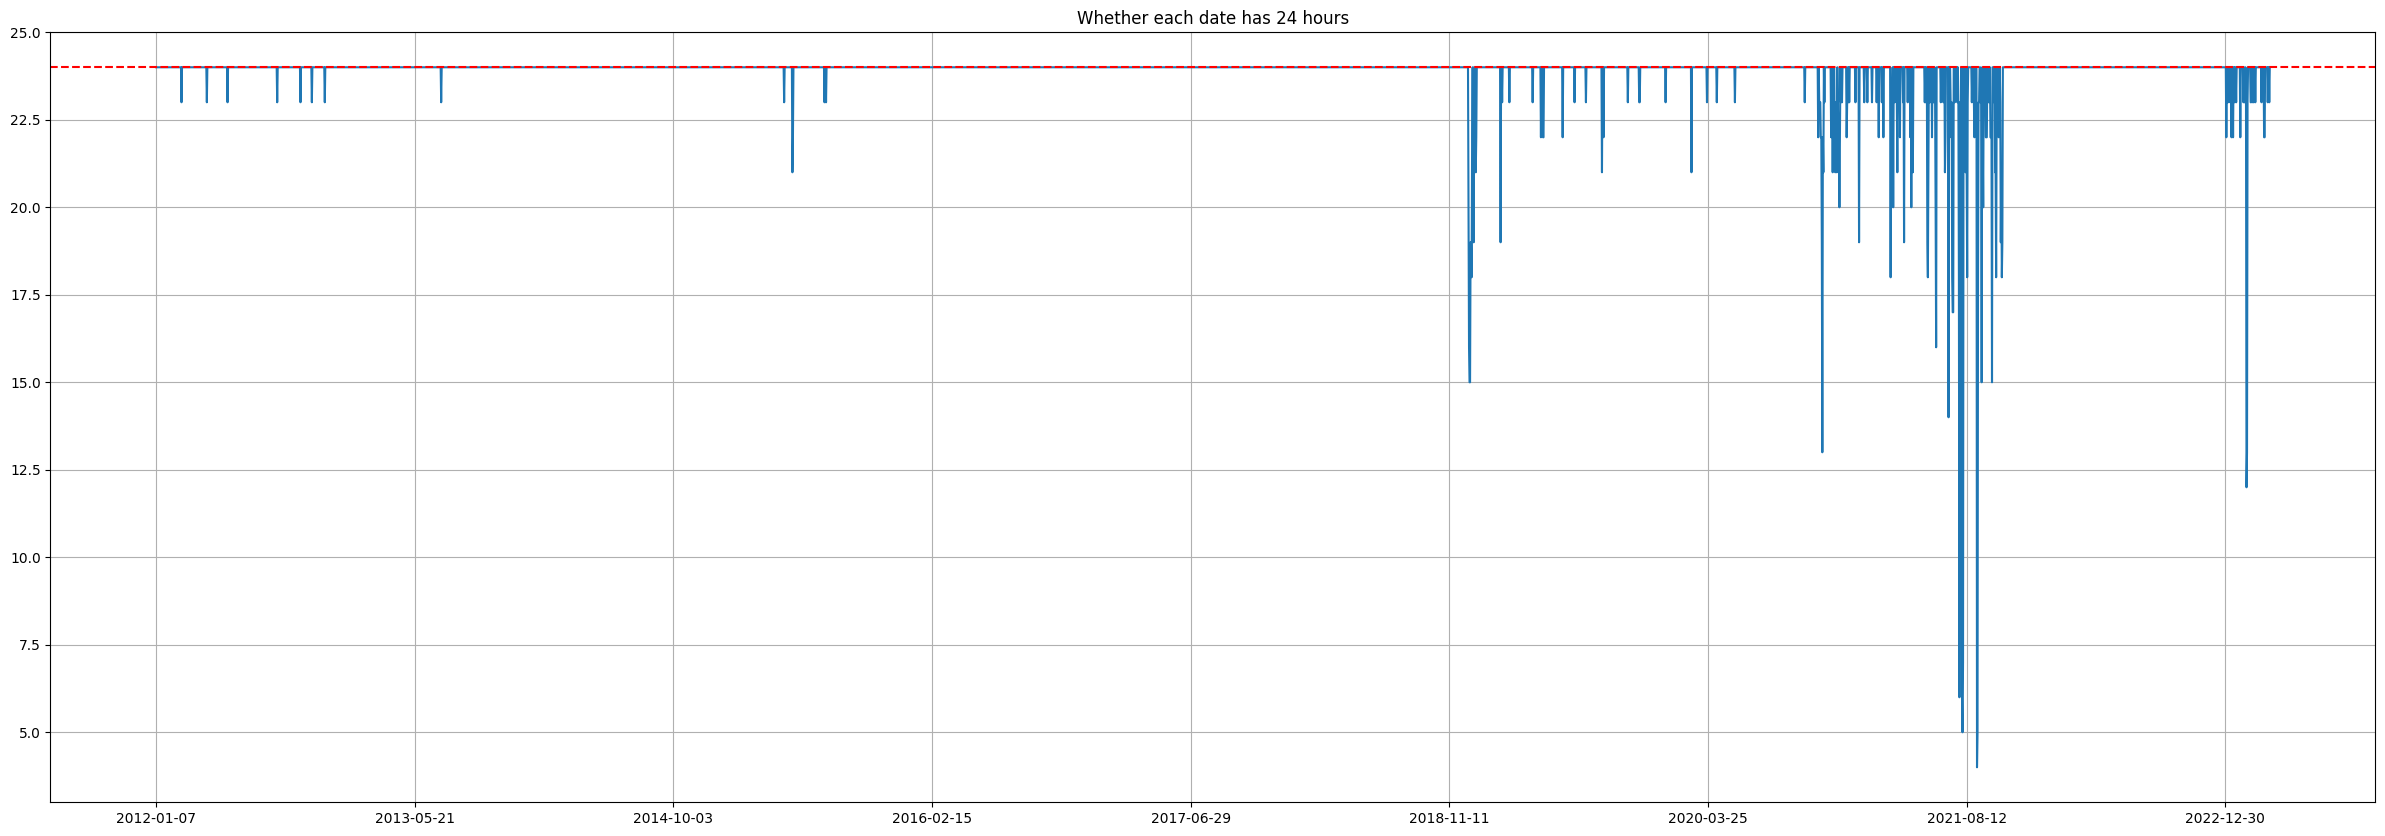

In [ ]:
#일별로 24개의 관측치가 있는지 확인해보자
plt.figure(figsize=(30,10))
ax = df['date'].value_counts().sort_index().plot()
plt.axhline(y=24, color='r', linestyle='--')
plt.title('Whether each date has 24 hours')
plt.grid()
plt.show()

흠... 24시간 모두 측정이 안 된 날이 존재하고, 특히 2020년 중반 이후에 매우 많다. 아마 코로나의 영향이지 않을까?

#결측치 있는 날짜, 시간 추출

In [ ]:
df_grouped = df.groupby('date').count(); df_grouped

,time,temp,hum,wind
date,,,,
2012-01-07,24,24,24,24
2012-01-08,24,24,24,24
2012-01-09,24,24,24,24
2012-01-10,24,24,24,24
2012-01-11,24,24,24,24
...,...,...,...,...
2023-03-27,23,23,23,23
2023-03-28,24,24,24,24
2023-03-29,24,24,24,24


In [ ]:
df_na = df_grouped.loc[df_grouped['time'] != 24]; df_na

,time,temp,hum,wind
date,,,,
2012-02-25,23,23,23,23
2012-04-14,23,23,23,23
2012-05-24,23,23,23,23
2012-08-28,23,23,23,23
2012-10-12,23,23,23,23
...,...,...,...,...
2023-03-15,23,23,23,23
2023-03-20,22,22,22,22
2023-03-21,22,22,22,22


In [ ]:
date_na = list(df_na.index); date_na

['2012-02-25',
 '2012-04-14',
 '2012-05-24',
 '2012-08-28',
 '2012-10-12',
 '2012-11-03',
 '2012-11-28',
 '2013-07-11',
 '2015-05-05',
 '2015-05-21',
 '2015-05-22',
 '2015-07-22',
 '2015-07-25',
 '2018-12-18',
 '2018-12-19',
 '2018-12-20',
 '2018-12-21',
 '2018-12-22',
 '2018-12-23',
 '2018-12-24',
 '2018-12-25',
 '2018-12-27',
 '2018-12-28',
 '2019-01-01',
 '2019-01-02',
 '2019-02-18',
 '2019-02-21',
 '2019-03-07',
 '2019-04-21',
 '2019-05-07',
 '2019-05-11',
 '2019-05-12',
 '2019-06-18',
 '2019-07-11',
 '2019-08-02',
 '2019-09-02',
 '2019-09-05',
 '2019-10-22',
 '2019-11-13',
 '2019-11-14',
 '2020-01-03',
 '2020-02-22',
 '2020-03-23',
 '2020-04-11',
 '2020-05-16',
 '2020-09-28',
 '2020-10-24',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28',
 '2020-10-29',
 '2020-10-30',
 '2020-10-31',
 '2020-11-01',
 '2020-11-02',
 '2020-11-03',
 '2020-11-05',
 '2020-11-18',
 '2020-11-21',
 '2020-11-25',
 '2020-11-26',
 '2020-11-27',
 '2020-11-28',
 '2020-11-29',
 '2020-12-01',
 '2020-12-02',
 '2020-12-

In [ ]:
len(date_na)

202

결측치 개 많 다!

In [ ]:
#원래 df에서 결측치 있는 date만 추출한 df
df_orig_na = df[df['date'].isin(date_na)]; df_orig_na

,date,time,temp,hum,wind
1176,2012-02-25,0,2.2,82,2.0
1177,2012-02-25,1,2.8,68,2.5
1178,2012-02-25,2,3.4,64,1.8
1179,2012-02-25,3,3.7,57,2.2
1180,2012-02-25,4,4.4,60,2.0
...,...,...,...,...,...
97455,2023-03-30,19,16.3,28,1.1
97456,2023-03-30,20,14.6,38,0.5
97457,2023-03-30,21,14.7,41,3.1
97458,2023-03-30,22,13.3,45,1.9


In [ ]:
df_orig_na.to_csv('/content/drive/MyDrive/Colab Notebooks/DAB/data/날씨데이터_결측치있는날만추출.csv')

In [ ]:
pivot = pd.pivot(df_orig_na, index='date', columns='time', values='time'); pivot

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2012-02-25,0.0,1.0,2.0,3.0,4.0,NaN,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
2012-04-14,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,NaN,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
2012-05-24,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,NaN,19.0,20.0,21.0,22.0,23.0
2012-08-28,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
2012-10-12,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,NaN,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,NaN,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
2023-03-20,0.0,1.0,2.0,3.0,4.0,5.0,NaN,7.0,8.0,9.0,...,NaN,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
2023-03-21,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,NaN,16.0,17.0,18.0,19.0,20.0,21.0,22.0,NaN


In [ ]:
pivot_filled = pivot.copy()
pivot_filled[~pivot_filled.isna()] = 1
pivot_filled[pivot_filled.isna()] = 0
pivot_filled

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2012-02-25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012-04-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012-05-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2012-08-28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012-10-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-20,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-03-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
pivot_filled.reset_index(inplace=True); pivot_filled

time,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2012-02-25,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2012-04-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2012-05-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,2012-08-28,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2012-10-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2023-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
198,2023-03-20,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
199,2023-03-21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
200,2023-03-27,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
pivot_filled_melt = pivot_filled.melt('date'); pivot_filled_melt

,date,time,value
0,2012-02-25,0,1.0
1,2012-04-14,0,1.0
2,2012-05-24,0,1.0
3,2012-08-28,0,1.0
4,2012-10-12,0,1.0
...,...,...,...
4843,2023-03-15,23,1.0
4844,2023-03-20,23,1.0
4845,2023-03-21,23,0.0
4846,2023-03-27,23,1.0


In [ ]:
new_df = pivot_filled_melt.loc[pivot_filled_melt['value'] == 0.0]; new_df

,date,time,value
10,2015-05-22,0,0.0
15,2018-12-20,0,0.0
16,2018-12-21,0,0.0
39,2019-11-14,0,0.0
45,2020-09-28,0,0.0
...,...,...,...
4785,2021-08-12,23,0.0
4791,2021-09-01,23,0.0
4818,2021-10-21,23,0.0
4835,2023-02-09,23,0.0


In [ ]:
new_df = new_df.sort_values(['date', 'time']); new_df

,date,time,value
1010,2012-02-25,5,0.0
3031,2012-04-14,15,0.0
3638,2012-05-24,18,0.0
2023,2012-08-28,10,0.0
4246,2012-10-12,21,0.0
...,...,...,...
3026,2023-03-20,14,0.0
3229,2023-03-21,15,0.0
4845,2023-03-21,23,0.0
1210,2023-03-27,5,0.0


In [ ]:
new_df = new_df.loc[:, ['date', 'time']]; new_df

,date,time
1010,2012-02-25,5
3031,2012-04-14,15
3638,2012-05-24,18
2023,2012-08-28,10
4246,2012-10-12,21
...,...,...
3026,2023-03-20,14
3229,2023-03-21,15
4845,2023-03-21,23
1210,2023-03-27,5


In [ ]:
new_df.reset_index(drop=True, inplace=True)
new_df

,date,time
0,2012-02-25,5
1,2012-04-14,15
2,2012-05-24,18
3,2012-08-28,10
4,2012-10-12,21
...,...,...
599,2023-03-20,14
600,2023-03-21,15
601,2023-03-21,23
602,2023-03-27,5


In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/DAB/data/net지수_없는데이터.csv')

우선, 24시간 모두 데이터가 존재한다고 가정한 상태에서, 분석을 진행하겠다.

#Calculating NET

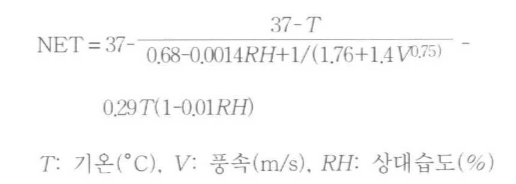

NET 지수 계산 위해 필요한 변수
- 시간대별 기온
- 시간대별 풍속
- 시간대별 (상대)습도


In [ ]:
#NET 계산 함수를 만들자

def NET(df):
    T = df['temp']
    V = df['wind']
    RH = df['hum']
    df.loc[:, 'net'] = 37 - ((37-T) / (0.68 - 0.0014*RH + 1/(1.76+1.4*(V**0.75)))) - 0.29*T*(1-0.01*RH)
    return df

In [ ]:
NET(df)

,date,time,temp,hum,wind,net
0,2012-01-07,0,-8.3,71,0.5,-9.180062
1,2012-01-07,1,-5.8,62,0.5,-6.081767
2,2012-01-07,2,-3.7,53,0.9,-6.105365
3,2012-01-07,3,-1.2,45,0.9,-3.254173
4,2012-01-07,4,0.3,37,0.5,0.749620
...,...,...,...,...,...,...
97479,2023-03-31,19,18.7,41,1.7,13.069146
97480,2023-03-31,20,17.9,42,1.9,12.025274
97481,2023-03-31,21,16.7,42,2.1,10.563523
97482,2023-03-31,22,15.7,44,2.1,9.577806


In [ ]:
df.net.describe()

count    97483.000000
mean         9.115609
std         11.092315
min        -29.602701
25%          0.274838
50%          9.957215
75%         18.695695
max         32.684777
Name: net, dtype: float64

#NET max 기준 이상치 탐지

In [ ]:
# Find the index of the rows with maximum 'net' value for each date
idx = df.groupby('date')['net'].idxmax()

# Create a new DataFrame with the selected rows
net_max_df = df.loc[idx, ['date', 'net', 'time', 'temp', 'hum', 'wind']]

print(net_max_df)

             date        net  time  temp  hum  wind
8      2012-01-07   1.278642     8   0.2   39   0.4
37     2012-01-08   2.953346    13  -2.4   70   0.0
52     2012-01-09   3.310496     4   2.6   56   0.3
75     2012-01-10   0.781226     3   0.4   38   0.5
108    2012-01-11  -4.411018    12  -6.4   45   0.4
...           ...        ...   ...   ...  ...   ...
97388  2023-03-27   7.973829    23   6.2   68   0.1
97401  2023-03-28  10.691740    12  14.4   33   0.9
97425  2023-03-29  13.676447    12  17.5   38   0.8
97452  2023-03-30  13.721810    15  21.0   26   2.8
97474  2023-03-31  16.825812    14  23.3   28   1.8

[4087 rows x 6 columns]


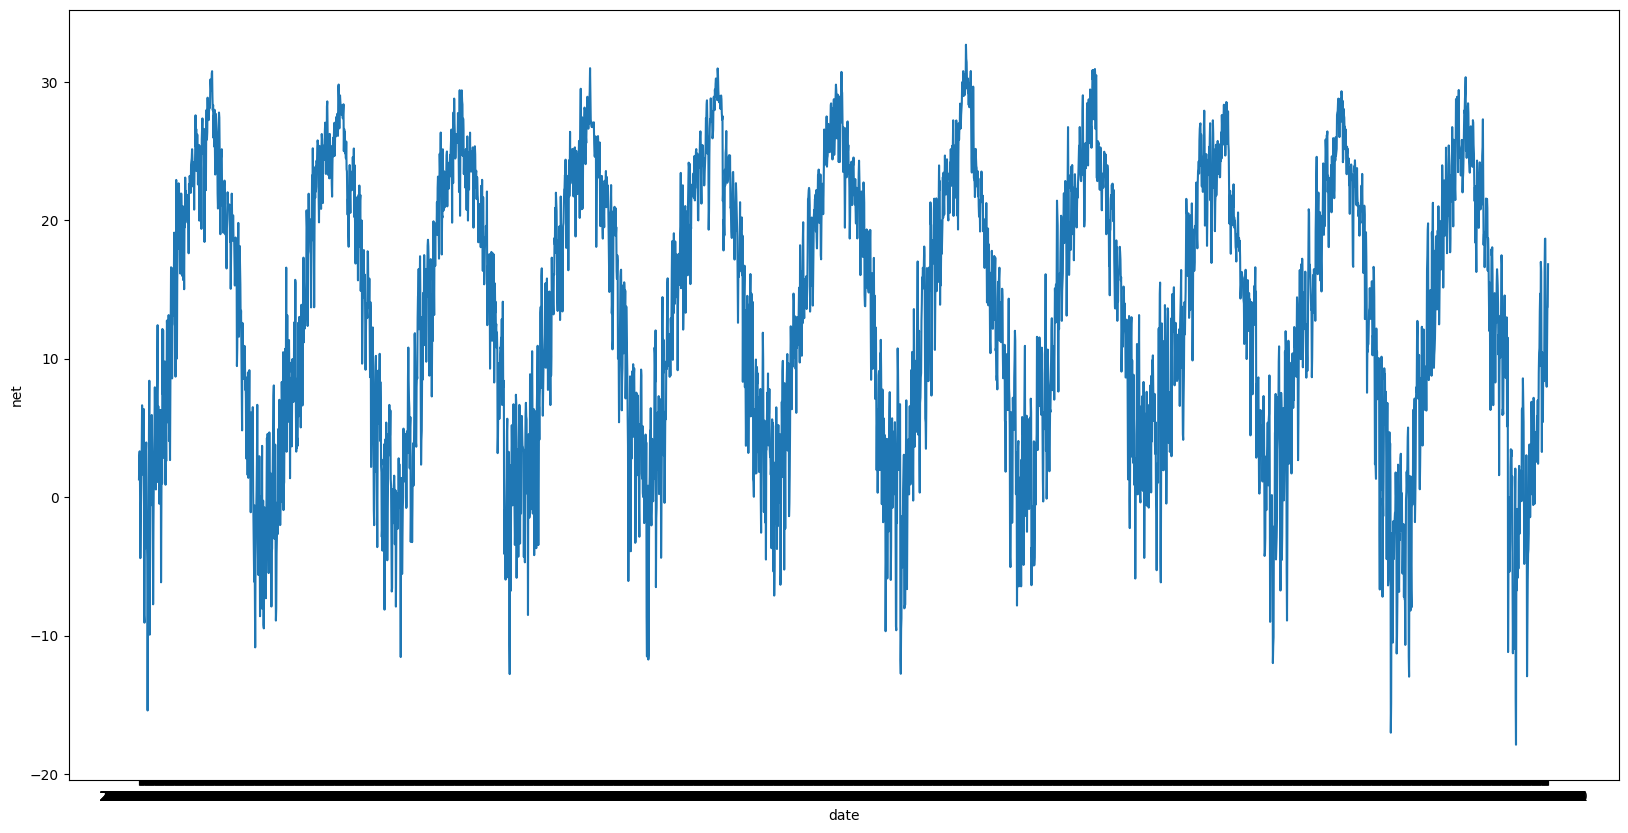

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='net', data=net_max_df)
plt.show()

In [ ]:
net_max_df_sort = net_max_df.sort_values(by='net', ascending=False); net_max_df_sort

,date,net,time,temp,hum,wind
57541,2018-08-01,32.684777,5,40.3,32,1.5
57566,2018-08-02,31.660170,6,37.9,42,1.9
57590,2018-08-03,31.420400,6,37.0,48,1.8
31382,2015-08-07,30.990007,6,35.0,60,0.3
40263,2016-08-11,30.971124,7,35.8,54,0.7
...,...,...,...,...,...,...
95256,2022-12-22,-14.536707,0,-2.6,71,3.6
86608,2021-12-26,-14.887491,16,-7.6,33,3.0
605,2012-02-01,-15.415733,5,-8.8,42,2.3
86583,2021-12-25,-17.019673,15,-8.4,33,3.7


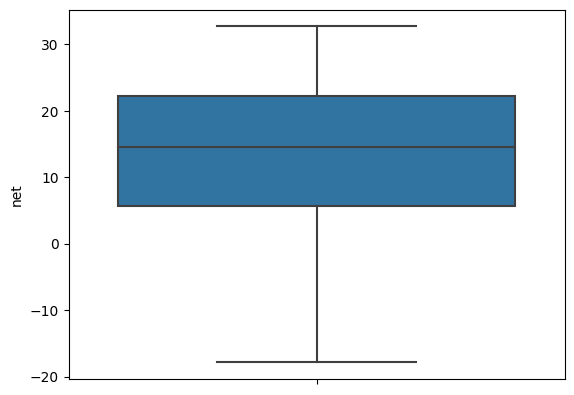

In [ ]:
sns.boxplot(data=net_max_df_sort, y='net')
plt.show()

In [ ]:
#상위 5% 데이터
df1 = net_max_df_sort[net_max_df_sort.reset_index(drop=True).index <= (3729*0.05)]; df1

,date,net,time,temp,hum,wind
57541,2018-08-01,32.684777,5,40.3,32,1.5
57566,2018-08-02,31.660170,6,37.9,42,1.9
57590,2018-08-03,31.420400,6,37.0,48,1.8
31382,2015-08-07,30.990007,6,35.0,60,0.3
40263,2016-08-11,30.971124,7,35.8,54,0.7
...,...,...,...,...,...,...
75256,2020-08-12,27.603809,6,30.6,70,0.6
14108,2013-08-17,27.603034,4,32.1,62,2.0
5213,2012-08-11,27.599080,8,30.6,60,0.1
48301,2017-07-12,27.596624,5,31.8,59,0.9


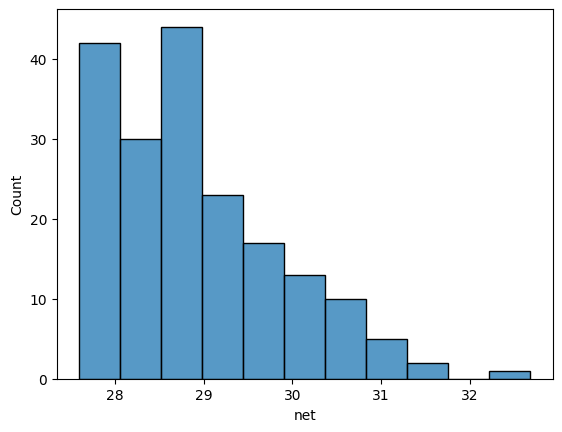

In [ ]:
sns.histplot(data=df1, x='net')
plt.show()

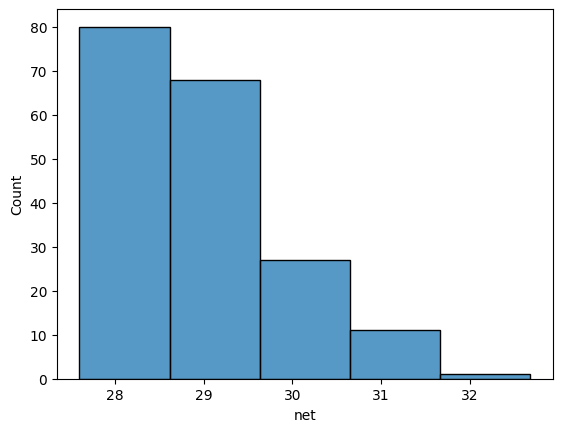

In [ ]:
sns.histplot(data=df1, x='net', bins=5)
plt.show()

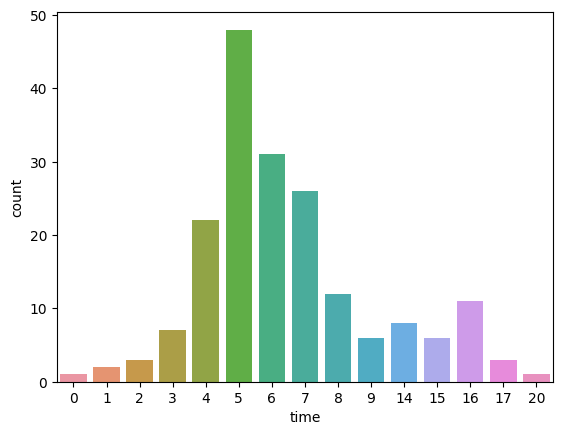

In [ ]:
sns.countplot(data=df1, x='time')
plt.show()

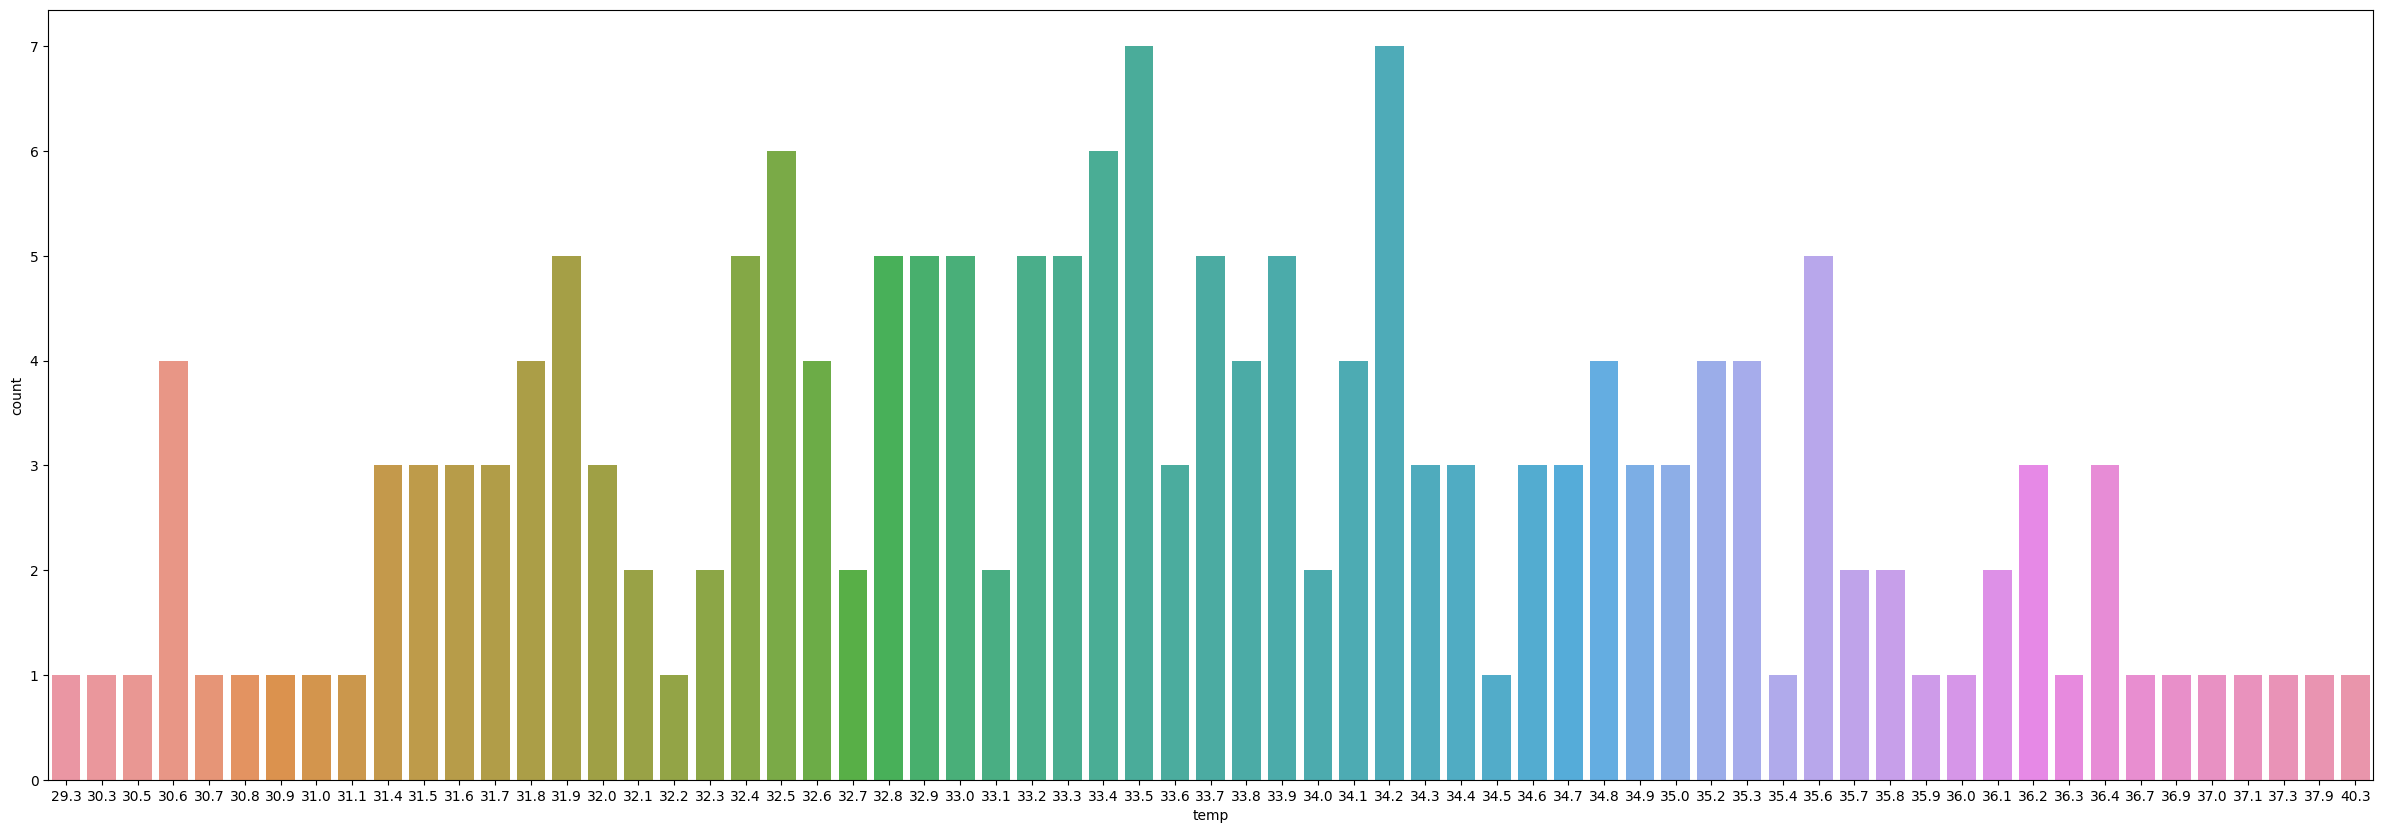

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data=df1, x='temp')
plt.show()

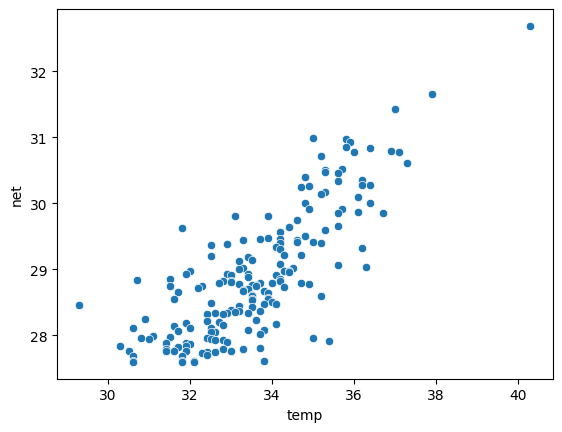

In [ ]:
#기온이 높을수록 net도 높아질까?
sns.scatterplot(x='temp', y='net', data=df1)
plt.show()

#NET min 기준 이상치 탐지

In [ ]:
# Find the index of the rows with minimum 'net' value for each date
idx = df.groupby('date')['net'].idxmin()

# Create a new DataFrame with the selected rows
net_min_df = df.loc[idx, ['date', 'net', 'time', 'temp', 'hum', 'wind']]

print(net_min_df)

             date        net  time  temp  hum  wind
0      2012-01-07  -9.180062     0  -8.3   71   0.5
24     2012-01-08  -6.797450     0  -6.5   74   0.4
71     2012-01-09 -10.510994    23  -6.2   76   0.9
95     2012-01-10 -12.899768    23  -6.3   57   1.8
118    2012-01-11 -14.423229    22 -11.3   70   0.8
...           ...        ...   ...   ...  ...   ...
97372  2023-03-27  -3.516262     7   3.0   63   1.8
97394  2023-03-28  -4.593865     5   3.0   81   1.8
97420  2023-03-29  -4.106931     7   4.8   87   2.3
97442  2023-03-30   2.674058     5   5.9   72   0.8
97466  2023-03-31   0.915175     6   7.1   69   1.7

[4087 rows x 6 columns]


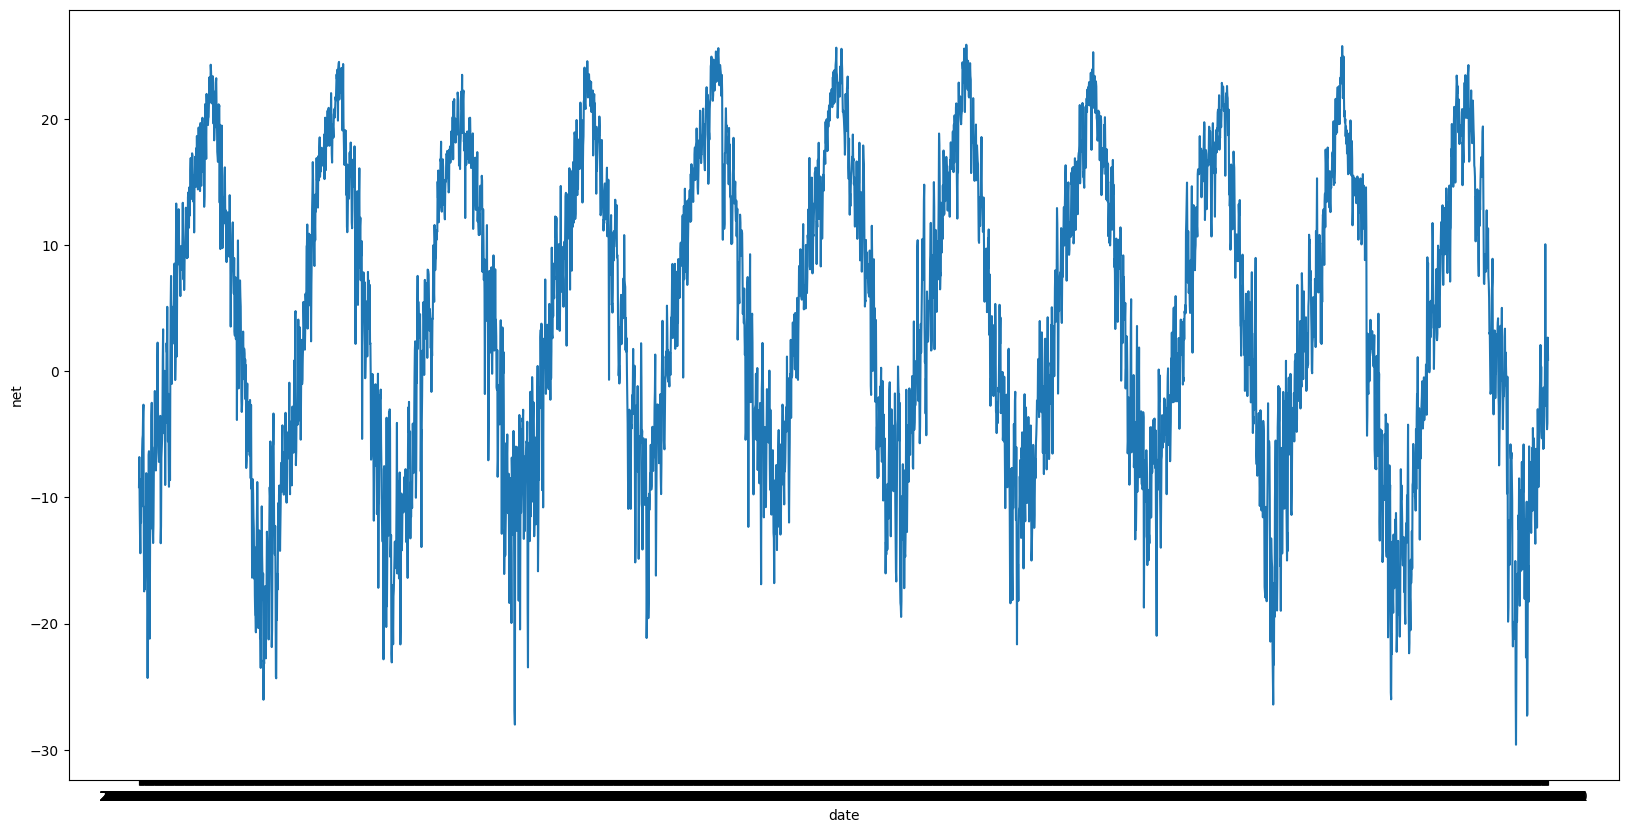

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y='net', data=net_min_df)
plt.show()

In [ ]:
net_min_df_sort = net_min_df.sort_values(by='net', ascending=True); net_min_df_sort

,date,net,time,temp,hum,wind
95284,2022-12-23,-29.602701,4,-13.2,62,5.7
26174,2015-01-01,-28.006624,22,-9.1,74,7.3
96059,2023-01-24,-27.301350,21,-15.6,55,3.4
96069,2023-01-25,-27.184060,7,-16.7,60,2.6
26147,2014-12-31,-26.899932,19,-8.0,55,12.6
...,...,...,...,...,...,...
57435,2018-07-27,25.587067,19,28.0,84,0.9
40318,2016-08-13,25.621527,14,28.8,78,1.3
48535,2017-07-21,25.657975,23,26.8,91,0.4
83404,2021-07-30,25.785517,23,30.2,66,2.1


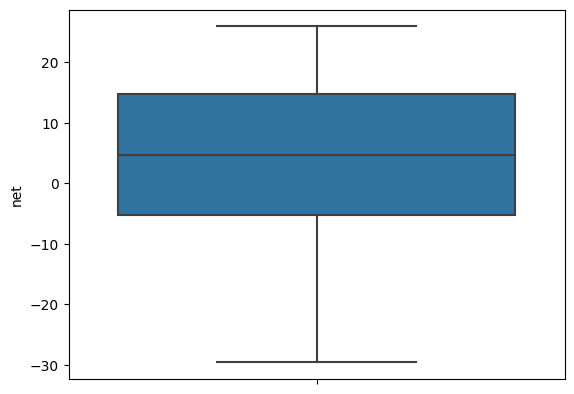

In [ ]:
sns.boxplot(data=net_min_df_sort, y='net')
plt.show()

In [ ]:
#하위 5% 데이터
df2 = net_min_df_sort[net_min_df_sort.reset_index(drop=True).index <= (3729*0.05)]; df2

,date,net,time,temp,hum,wind
95284,2022-12-23,-29.602701,4,-13.2,62,5.7
26174,2015-01-01,-28.006624,22,-9.1,74,7.3
96059,2023-01-24,-27.301350,21,-15.6,55,3.4
96069,2023-01-25,-27.184060,7,-16.7,60,2.6
26147,2014-12-31,-26.899932,19,-8.0,55,12.6
...,...,...,...,...,...,...
86425,2021-12-19,-15.835121,1,-0.5,99,4.3
433,2012-01-25,-15.829025,1,-8.9,40,2.5
60771,2018-12-13,-15.810941,19,-6.8,76,1.9
17775,2014-01-16,-15.787229,23,-4.4,93,2.2


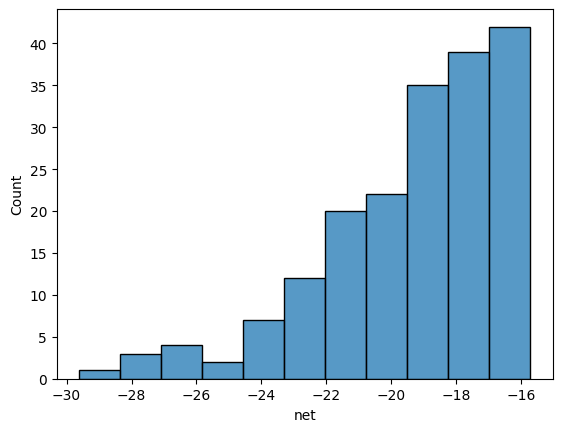

In [ ]:
sns.histplot(data=df2, x='net')
plt.show()

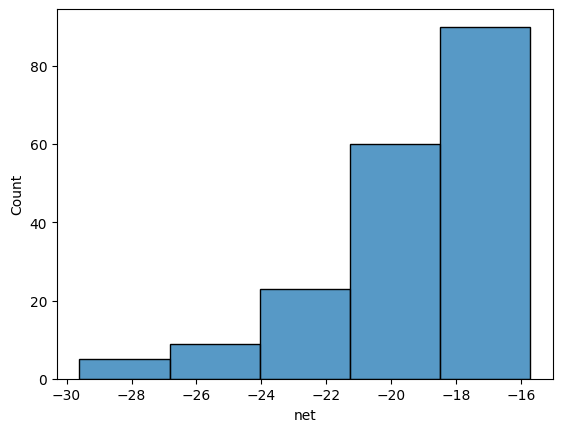

In [ ]:
sns.histplot(data=df2, x='net', bins=5)
plt.show()

[]

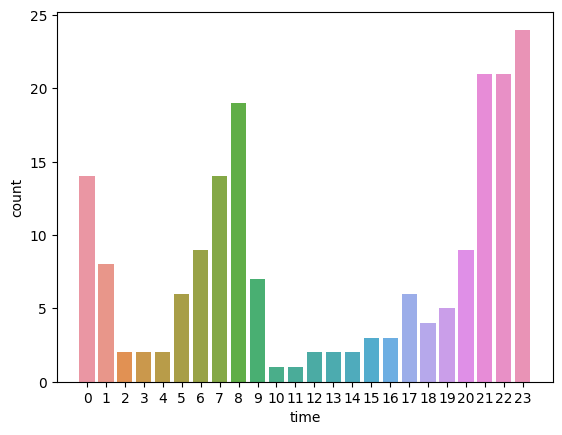

In [ ]:
sns.countplot(data=df2, x='time')
plt.plot()

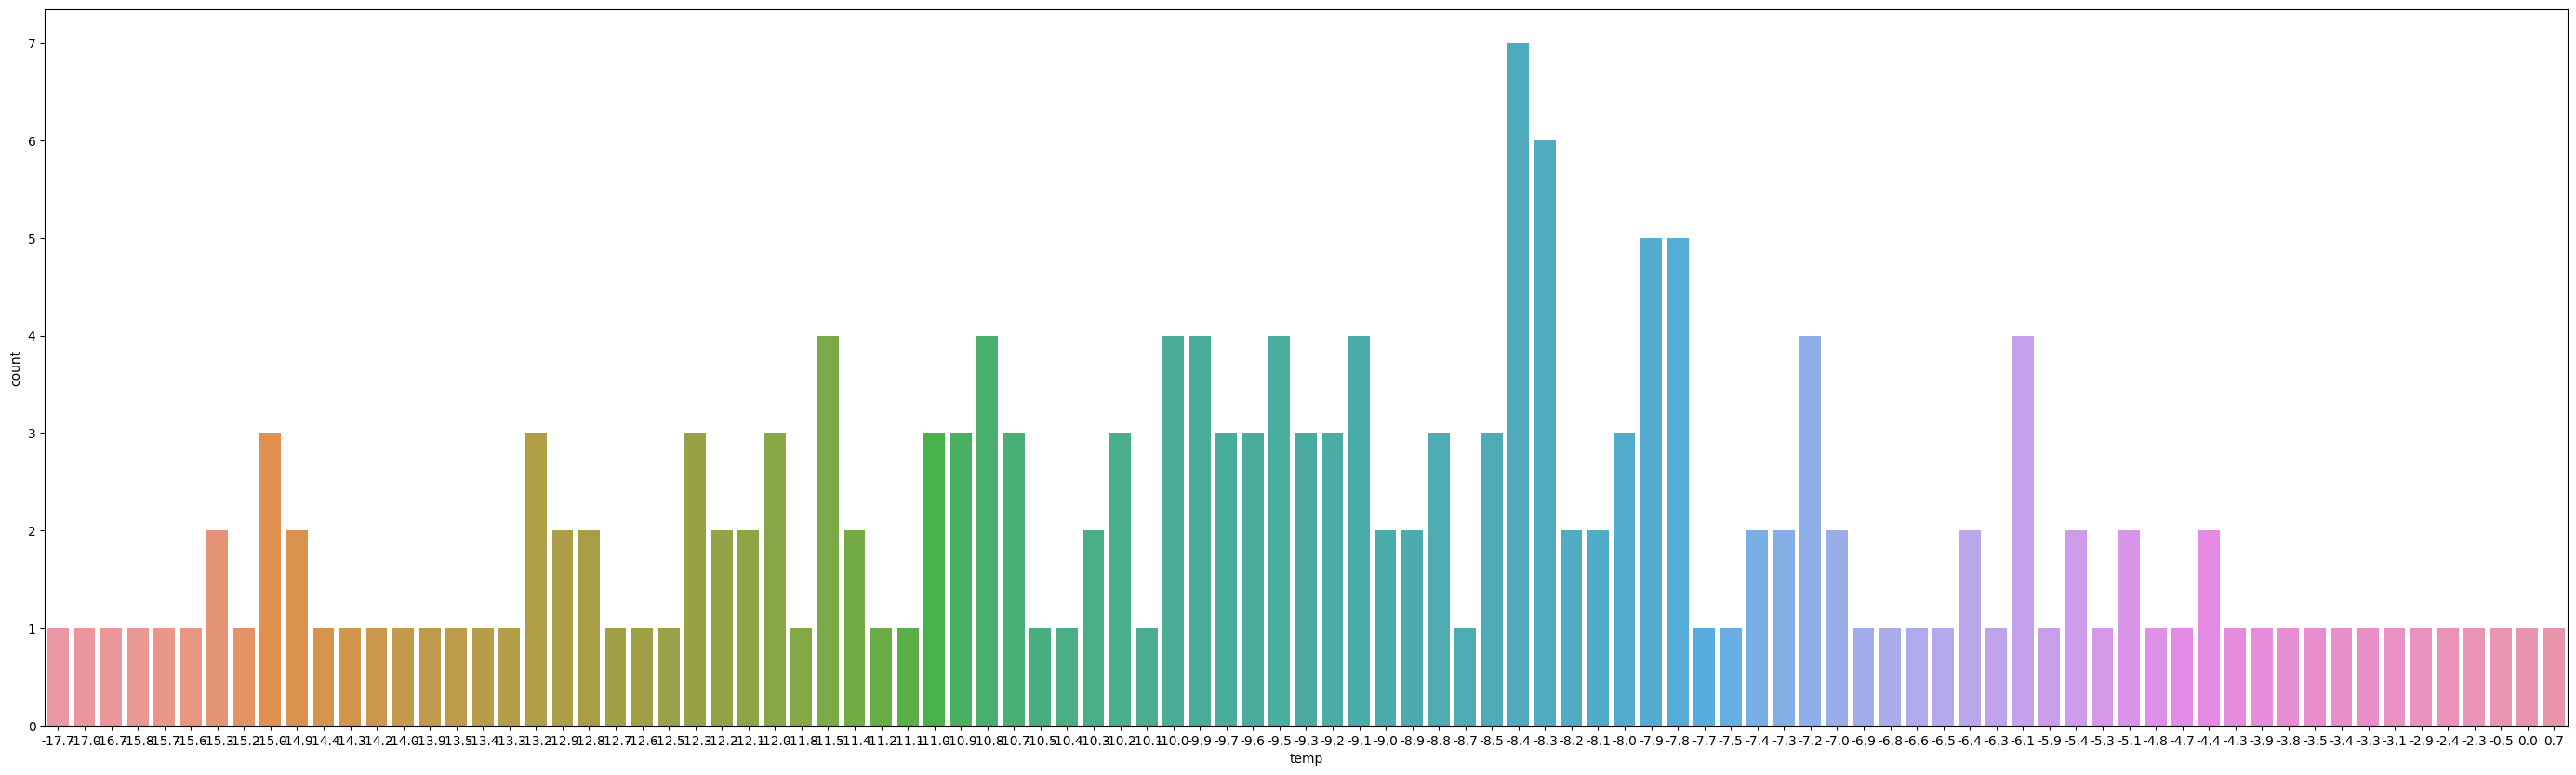

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(data=df2, x='temp')
plt.show()

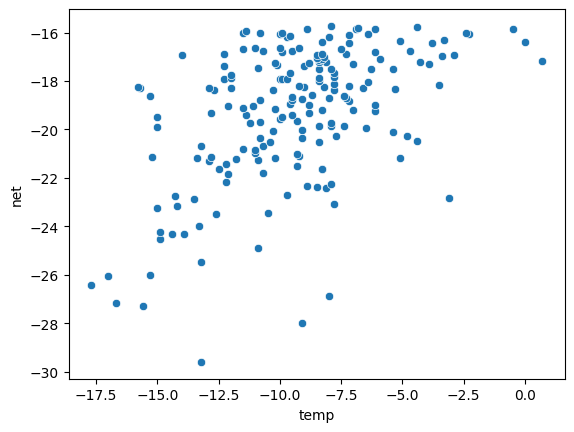

In [ ]:
#기온이 낮을수록 net도 낮아질까?
sns.scatterplot(x='temp', y='net', data=df2)
plt.show()